# SVM (서포트 벡터 머신)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams['font.family']='NanumGothic'

## 데이터 구성하기

In [3]:
df_raw=pd.read_csv("C:/python/2. Big Data 분석/유방암.csv", encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 데이터 개수 확인

In [4]:
df_raw.shape

(320, 31)

변수 : 31개, 자료수 320개 

### 데이터 타입 확인

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

목표변수 diagnosis는 범주형 변수이므로 object type
그 외로는 모두 연속형 변수이므로 float64 type 확인

### 결측치 처리

In [6]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

결측치 없음. 그대로 진행

### 기술 통계량 확인

In [7]:
df_raw.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


### 목표변수(diagnosis), 설명변수 데이터 구성

In [8]:
# 설명변수
df_raw_x=df_raw.drop('diagnosis', axis=1) 
# 목표변수 (diagnosis)
df_raw_y=df_raw['diagnosis']

In [9]:
df_raw_y.head()

0    음성
1    양성
2    음성
3    양성
4    양성
Name: diagnosis, dtype: object

In [10]:
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### Scale 변환

In [11]:
v_feature_name=df_raw_x.columns
# Standard Scaler 적용해서 변환
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


### 데이터 분할 train(0.6) : test(0.4)

In [12]:
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.4)
df_train_y, df_test_y=train_test_split(df_raw_y, test_size=0.4)
print("train data : ", df_scaled_train_x.shape)
print("test data : ", df_scaled_test_x.shape)

train data :  (192, 30)
test data :  (128, 30)


train data 총 192개, test data 총 128개로 구성됨

### 목표변수 확인

In [13]:
df_raw_y.value_counts()

음성    212
양성    108
Name: diagnosis, dtype: int64

 목표변수 전체에서 음성은 212개, 양성은 108개로 확인

In [14]:
df_test_y.value_counts()

음성    84
양성    44
Name: diagnosis, dtype: int64

목표변수 test data 중 음성은 84개, 양성은 44개 결과 확인

## SVC 모델 생성

### 기본 옵션으로 모델 생성

In [15]:
svm_scaled=SVC()
svm_scaled.fit(df_scaled_train_x, df_train_y)

SVC()

In [16]:
print("Accuracy on training set : {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set : 0.714
Accuracy on test set : 0.648


기본 옵션으로 의사결정나무 모델 생성시, 모델 정확도는 train 71.4%, test 64.1%로 모델은 train data에 과대적합

## 모델 Parameter 조정

### Cost : cost 변경에 따른 모델 성능

In [35]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# c: 규제
para_c = [c*0.1 for c in range(1,21)]

for v_C in para_c :
    svm=SVC(C=v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['Train Accuracy']=train_accuracy
df_accuracy_c['Test Accuracy']=test_accuracy

In [36]:
# 모델 정확도 확인
df_accuracy_c.round(3)

,C,Train Accuracy,Test Accuracy
0,0.1,0.667,0.656
1,0.2,0.667,0.656
2,0.3,0.667,0.656
3,0.4,0.667,0.656
4,0.5,0.667,0.656
5,0.6,0.672,0.656
6,0.7,0.688,0.656
7,0.8,0.688,0.656
8,0.9,0.708,0.648
9,1.0,0.714,0.648


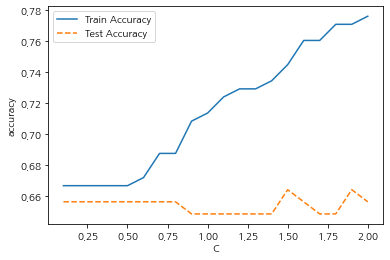

In [37]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

cost가 클수록 train data는 과대적합 경향성을 보임. 
train data가 과대적합됨에 따라 test data의 정확도가 감소함.
따라서 test data의 성능을 최대한 향상시키고 과대적합을 방지하기 위해 cost는 0.6으로 설정

### Gamma : Gamma(데이터의 영향 범위) 변경에 따른 모델 성능

In [53]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# para_gamma
para_gamma=[0.02*gamma for gamma in range(1,15)]

for v_gamma in para_gamma :
    svm=SVC(gamma=v_gamma, C=0.6)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['Train Accuracy']=train_accuracy
df_accuracy_gamma['Test Accuracy']=test_accuracy

In [54]:
# 모델 정확도 확인
df_accuracy_gamma.round(3)

,gamma,Train Accuracy,Test Accuracy
0,0.02,0.672,0.656
1,0.04,0.672,0.656
2,0.06,0.677,0.656
3,0.08,0.682,0.656
4,0.10,0.688,0.656
5,0.12,0.688,0.656
6,0.14,0.693,0.656
7,0.16,0.693,0.656
8,0.18,0.698,0.656
9,0.20,0.693,0.656


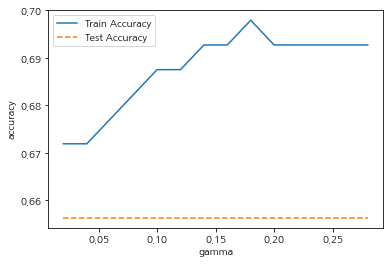

In [55]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

gamma가 클수록 train data 과적합 경향이 나타남.
test data 성능 향상시키고 과대적합 방지하기 위해서 gamma는 0.03으로 설정

## 최종 모델

In [56]:
svc_final=SVC(gamma=0.03, C=0.6)
svc_final.fit(df_scaled_train_x, df_train_y)

SVC(C=0.6, gamma=0.03)

### 최종 모델 성능 평가

In [57]:
# 모델 정확도
print("Train Data Accuracy :", svc_final.score(df_scaled_train_x, df_train_y).round(3))
print("Test Data Accuracy :", svc_final.score(df_scaled_test_x, df_test_y).round(3))

Train Data Accuracy : 0.672
Test Data Accuracy : 0.656


최종 모델은 train data에서 67.2%의 정확도를 보이며, test data에서는 65.6%의 정확도를 보인다. 처음보다 train data의 성능은 조금 감소하였지만 test data의 성능은 오히려 향상되었고 train data와 test data사이에 1%정도의 정확도 차이를 보이며 과대적합 문제를 해결하였음을 알 수 있다.

### 최종 모델을 이용한 분류 예측

In [58]:
# 목표범수 예측
y_pred=svc_final.predict(df_scaled_test_x)

# Confusion matrix
print("Confusion Matrix :\n{}".format(confusion_matrix(df_test_y, y_pred)))

Confusion Matrix :
[[ 0 44]
 [ 0 84]]


[Confusion Matrix]
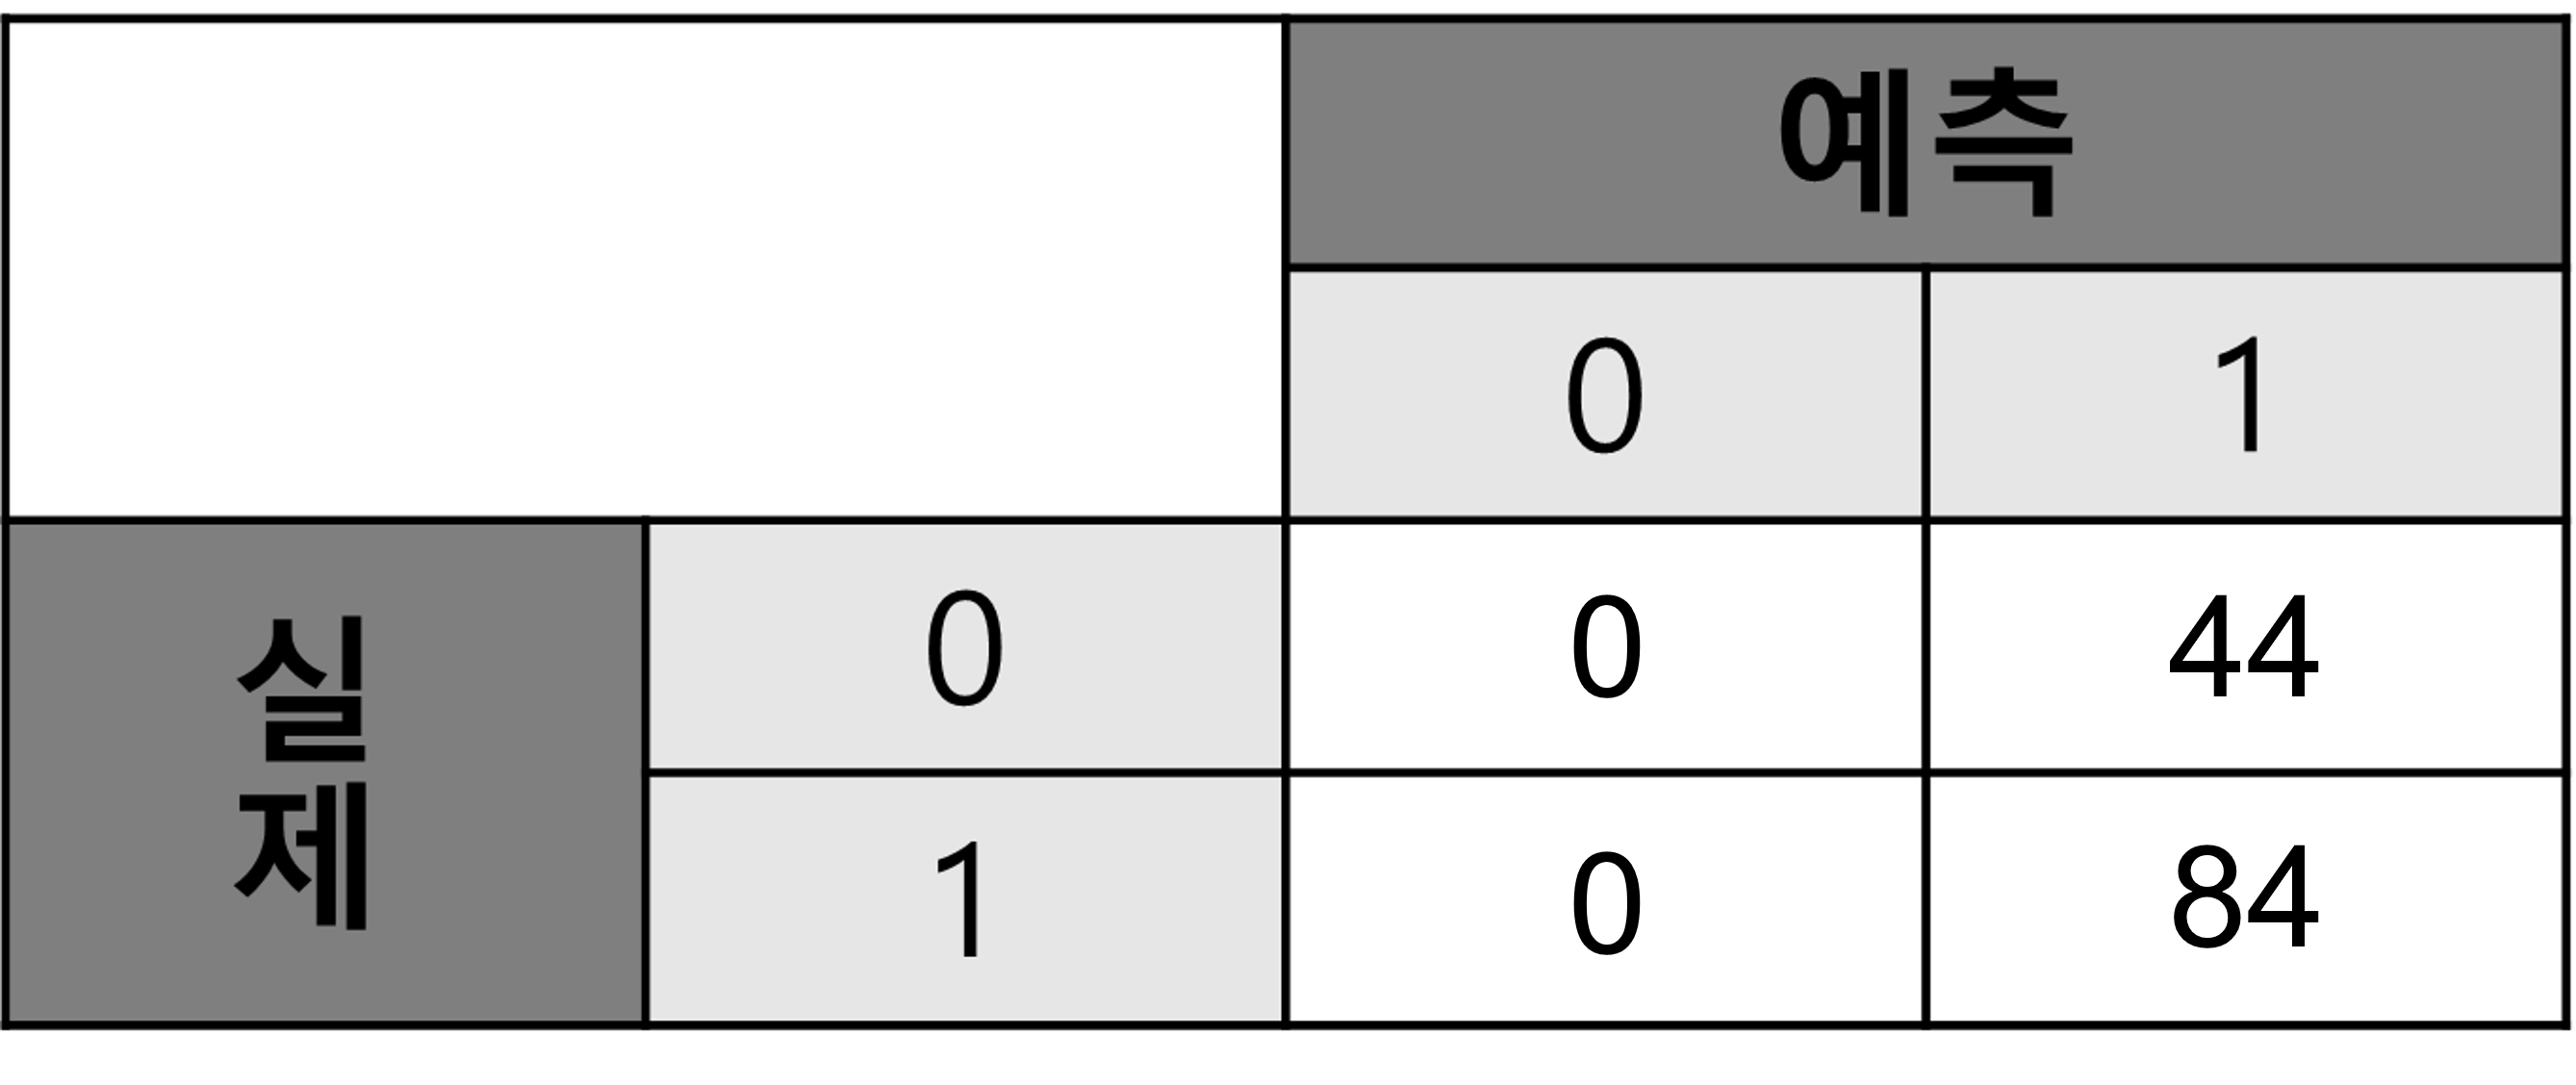

이 때, 0은 양성 data, 1은 음성 data를 의미함

최종 모델 확인 결과, 유방암 데이터 셋을 SVM을 통해 음성,양성을 분류하였을 때 test data의 성능은 65.6%인 것으로 나타났다.
그러나 이 수치는 test data 전체 128개를 모두 음성으로 분류함으로써 나타나는 수치였다. 
따라서 실제로 음성인 것을 양성으로 판단하는 일은 없었으나 실제로는 양성인 데이터조차 모두 음성으로 판단하였기 때문에 오분류율이 34.3%에 달하는 것으로 나타난다. 이는 심각한 문제이며 서포트 벡터 머신 대신 랜덤포레스트 모델로 음성/양성을 분류하는 것이 더 적절해보인다. 